In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.dtypes[train_df.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

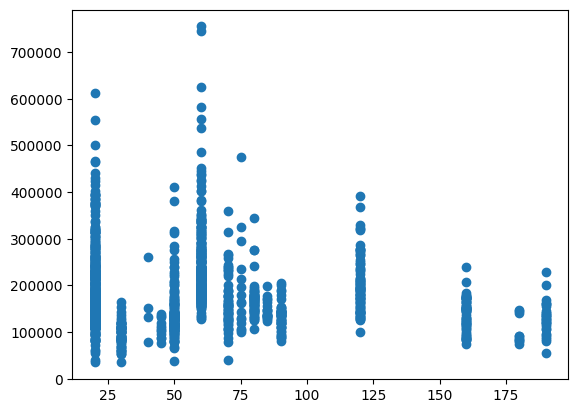

In [6]:
plt.scatter(x="MSSubClass", y="SalePrice", data=train_df)

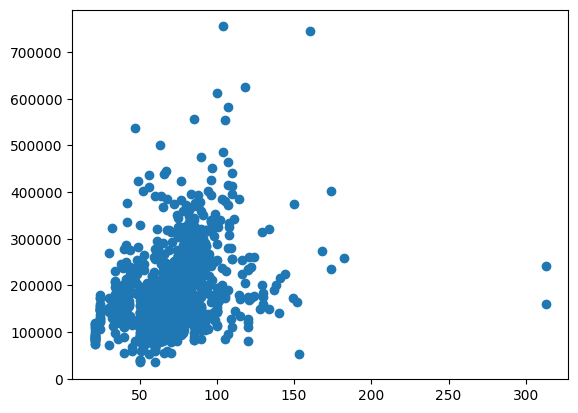

In [7]:
plt.scatter(x="LotFrontage", y="SalePrice", data=train_df)

In [8]:
train_df.query("LotFrontage>300")
#Drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


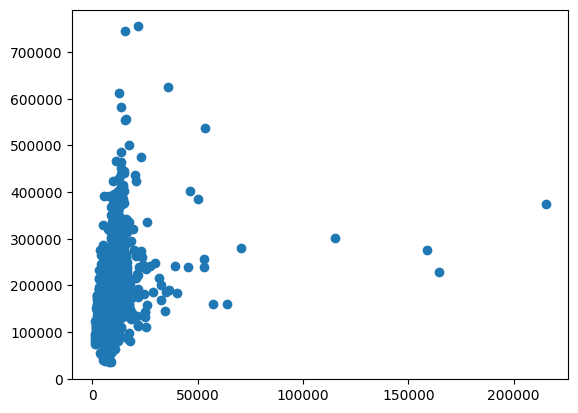

In [9]:
plt.scatter(x="LotArea", y="SalePrice", data=train_df)

In [10]:
train_df.query("LotArea>55000")
#Drop 250, 314, 336, 707
#Maybe Drop 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [11]:
stats.zscore(train_df["LotArea"]).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

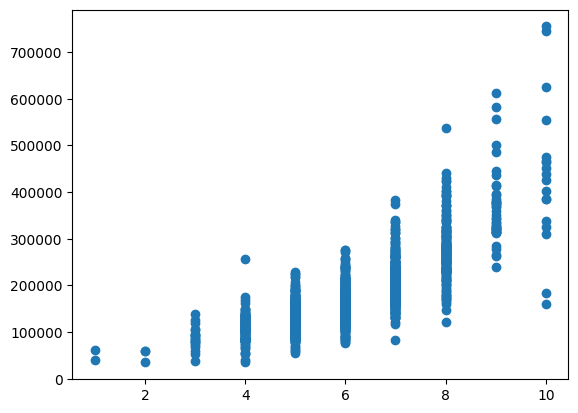

In [12]:
plt.scatter(x="OverallQual", y="SalePrice", data=train_df)

In [13]:
train_df.query("OverallQual==10")
#Maybe Drop 524, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


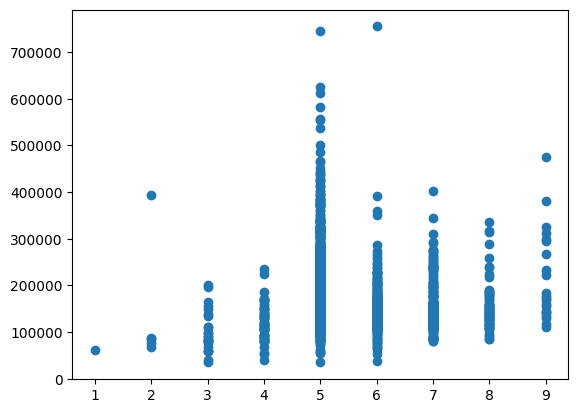

In [14]:
plt.scatter(x="OverallCond", y="SalePrice", data=train_df)

In [15]:
train_df.query("OverallCond==2")
#Drop 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [16]:
train_df.query("OverallCond==5 & SalePrice>700000")
#Drop 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [17]:
train_df.query("OverallCond==6 & SalePrice>700000")
#Drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


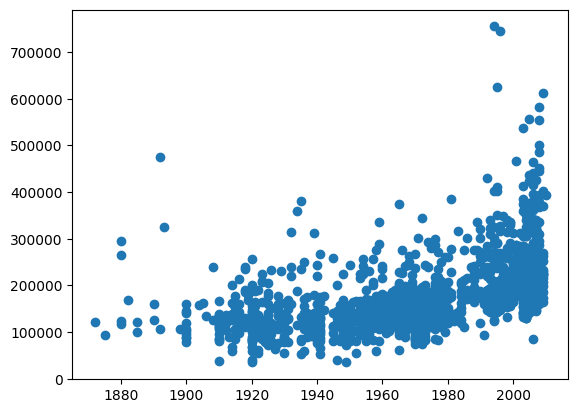

In [18]:
plt.scatter(x="YearBuilt", y="SalePrice", data=train_df)

In [19]:
train_df.query("YearBuilt<1900 & SalePrice>400000")
#Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


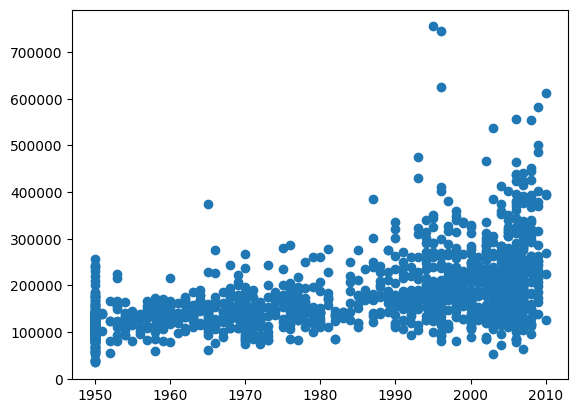

In [20]:
plt.scatter(x="YearRemodAdd", y="SalePrice", data=train_df)

In [21]:
train_df.query("YearRemodAdd<1970 & SalePrice>300000")
#Drop 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


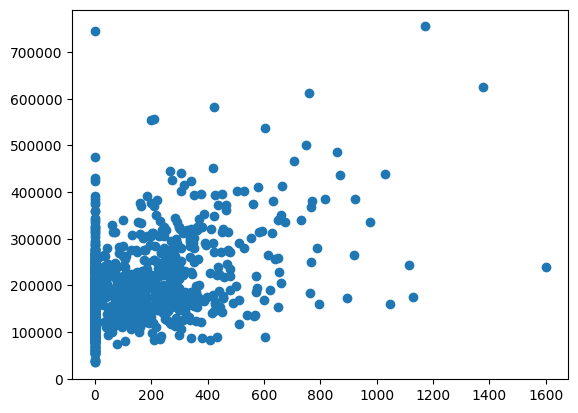

In [22]:
plt.scatter(x="MasVnrArea", y="SalePrice", data=train_df)

In [23]:
train_df.query("MasVnrArea>1500")
#Drop 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


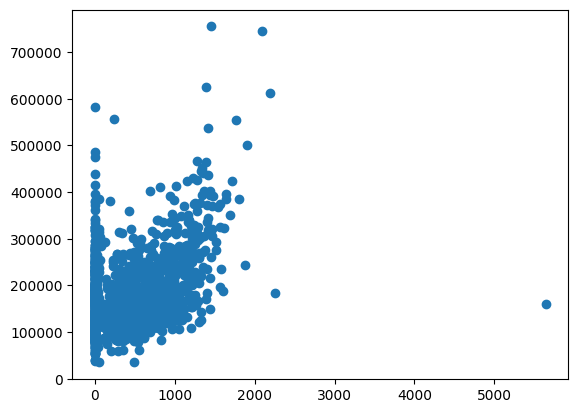

In [24]:
plt.scatter(x="BsmtFinSF1", y="SalePrice", data=train_df)

In [25]:
train_df.query("BsmtFinSF1>5000")
#Drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


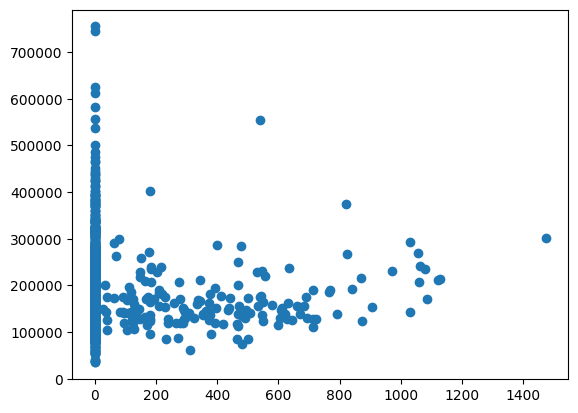

In [26]:
plt.scatter(x="BsmtFinSF2", y="SalePrice", data=train_df)

In [27]:
train_df.query("BsmtFinSF2>400 & SalePrice>500000")
#Drop 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [28]:
train_df.query("BsmtFinSF2>1400")
#Drop 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


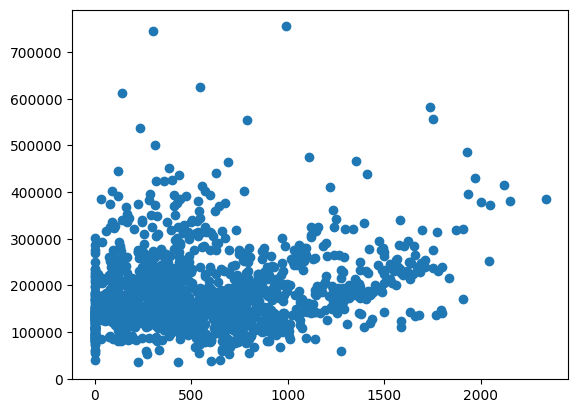

In [29]:
plt.scatter(x="BsmtUnfSF", y="SalePrice", data=train_df)

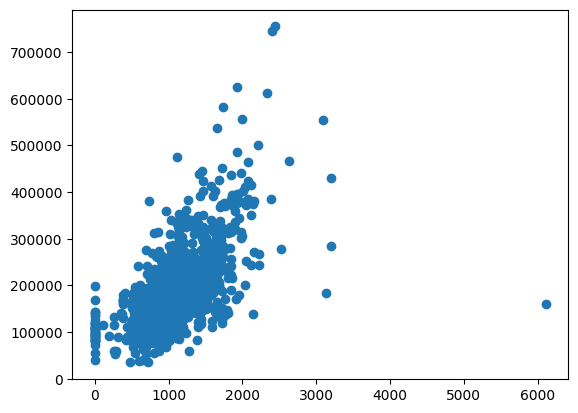

In [30]:
plt.scatter(x="TotalBsmtSF", y="SalePrice", data=train_df)

In [31]:
train_df.query("TotalBsmtSF>5000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


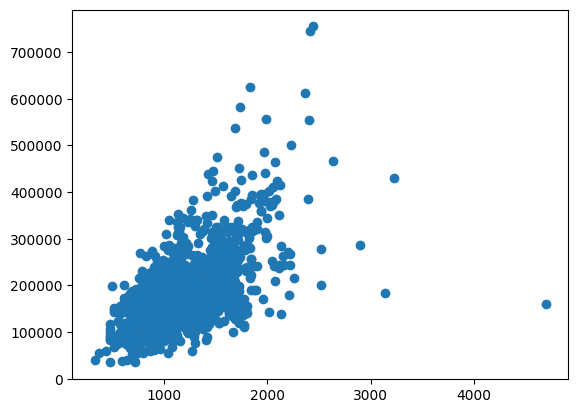

In [32]:
plt.scatter(x="1stFlrSF", y="SalePrice", data=train_df)

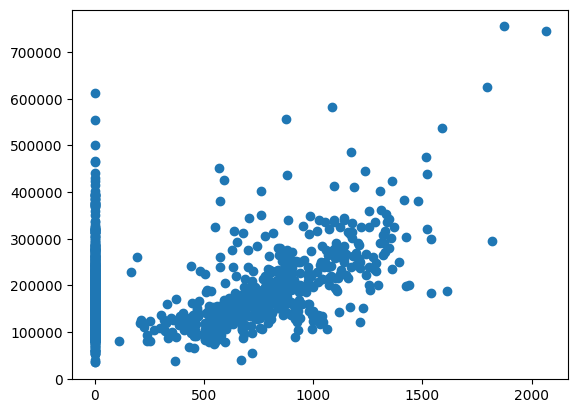

In [33]:
plt.scatter(x="2ndFlrSF", y="SalePrice", data=train_df)

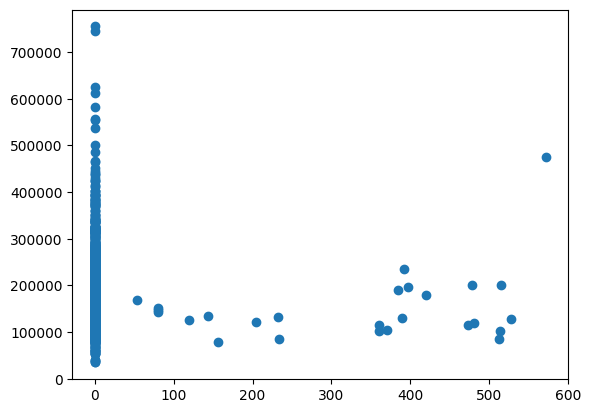

In [34]:
plt.scatter(x="LowQualFinSF", y="SalePrice", data=train_df)

In [35]:
train_df.query("LowQualFinSF>500")
#Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


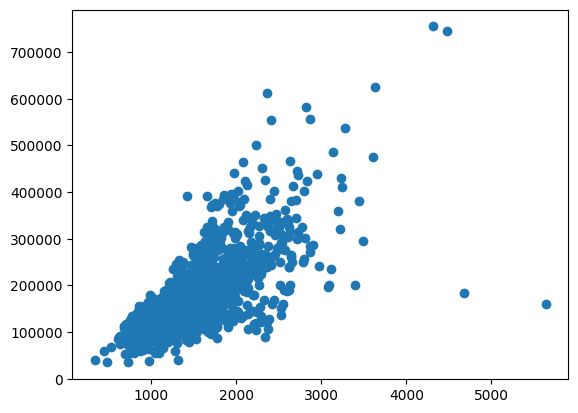

In [36]:
plt.scatter(x="GrLivArea", y="SalePrice", data=train_df)

In [37]:
train_df.query("GrLivArea>4400")
#Drop 524, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


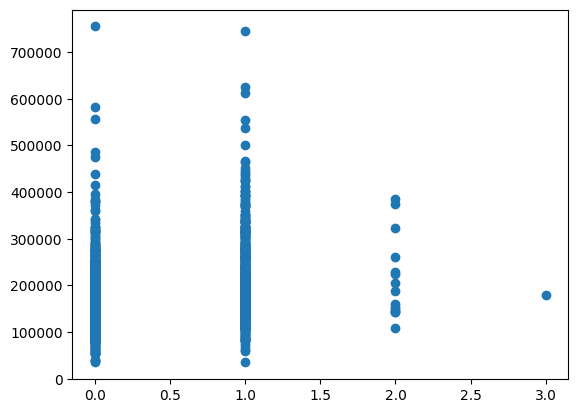

In [38]:
plt.scatter(x="BsmtFullBath", y="SalePrice", data=train_df)

In [39]:
train_df.query("BsmtFullBath==3")
#Drop 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


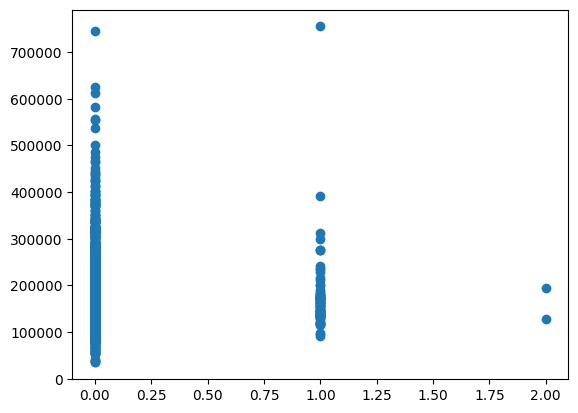

In [40]:
plt.scatter(x="BsmtHalfBath", y="SalePrice", data=train_df)

In [41]:
stats.zscore(train_df["BsmtHalfBath"]).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [42]:
train_df.query("BsmtHalfBath==2")
#Drop 598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


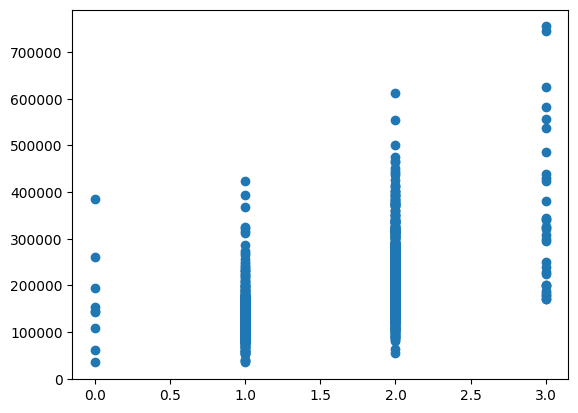

In [43]:
plt.scatter(x="FullBath", y="SalePrice", data=train_df)

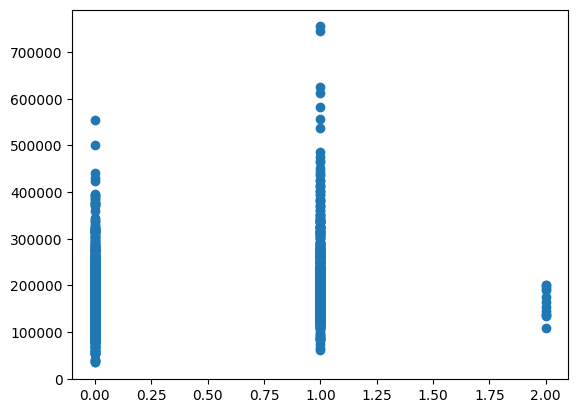

In [44]:
plt.scatter(x="HalfBath", y="SalePrice", data=train_df)

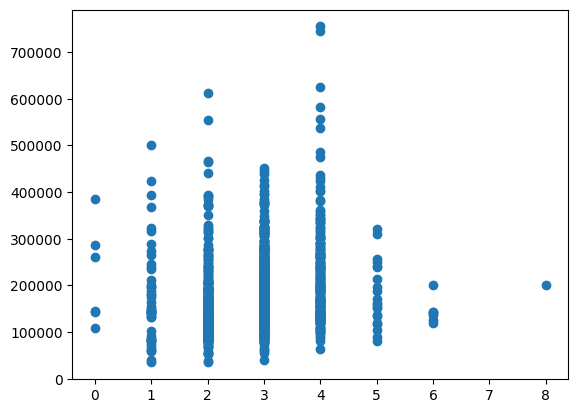

In [45]:
plt.scatter(x="BedroomAbvGr", y="SalePrice", data=train_df)

In [46]:
train_df.query("BedroomAbvGr==8")
#Drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


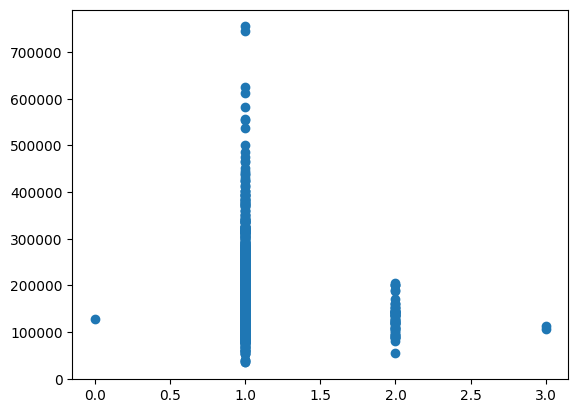

In [47]:
plt.scatter(x="KitchenAbvGr", y="SalePrice", data=train_df)

In [48]:
train_df.query("KitchenAbvGr==3")
#Drop 49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


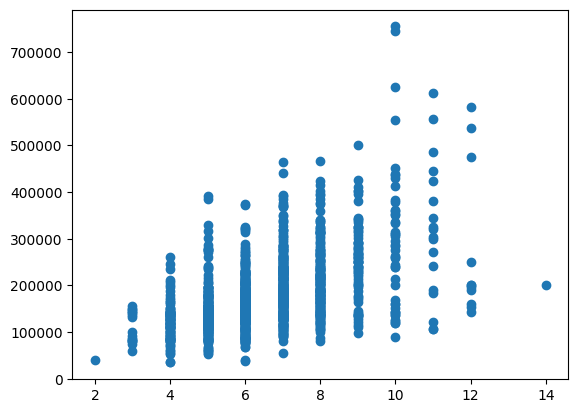

In [49]:
plt.scatter(x="TotRmsAbvGrd", y="SalePrice", data=train_df)

In [50]:
train_df.query("TotRmsAbvGrd==14")
#Drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


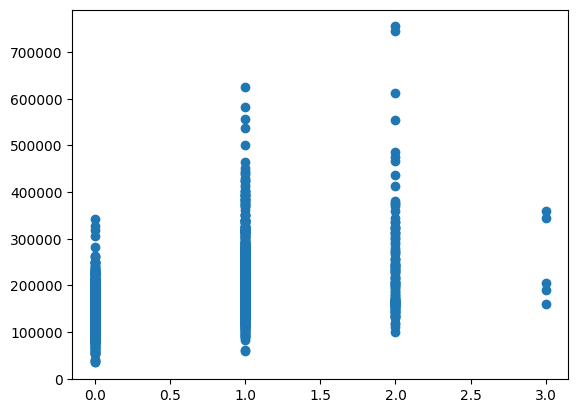

In [51]:
plt.scatter(x="Fireplaces", y="SalePrice", data=train_df)

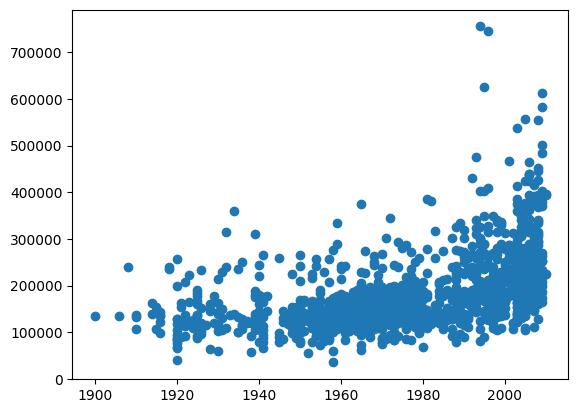

In [52]:
plt.scatter(x="GarageYrBlt", y="SalePrice", data=train_df)

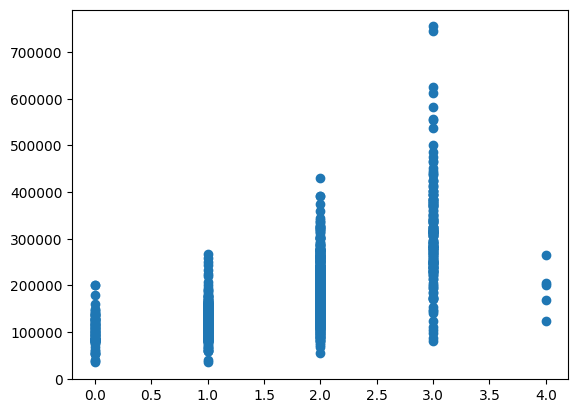

In [53]:
plt.scatter(x="GarageCars", y="SalePrice", data=train_df)

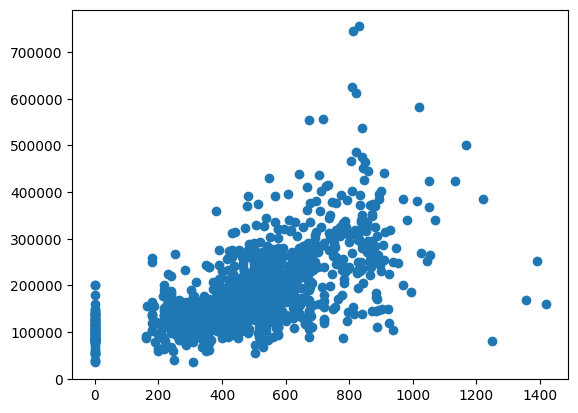

In [54]:
plt.scatter(x="GarageArea", y="SalePrice", data=train_df)

In [55]:
train_df.query("GarageArea>1200")
#Drop 1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


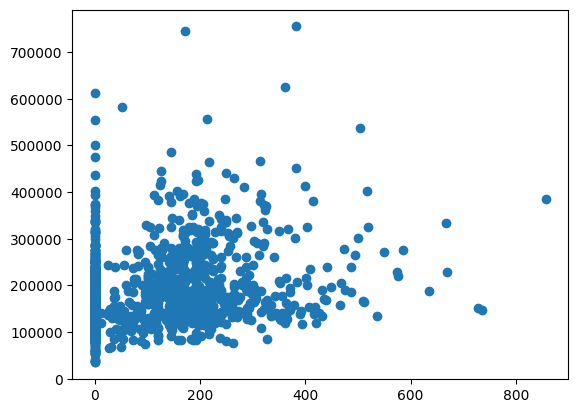

In [56]:
plt.scatter(x="WoodDeckSF", y="SalePrice", data=train_df)

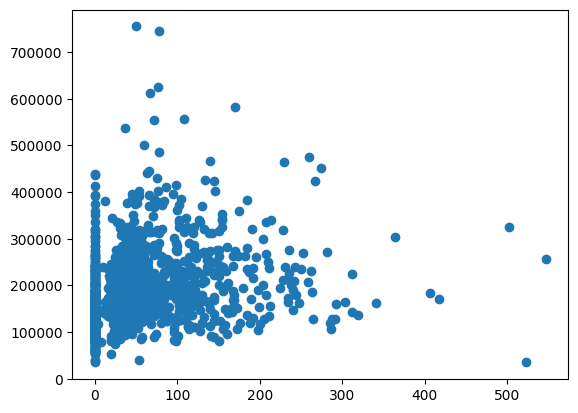

In [57]:
plt.scatter(x="OpenPorchSF", y="SalePrice", data=train_df)

In [58]:
train_df.query("OpenPorchSF>500")
#Drop 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


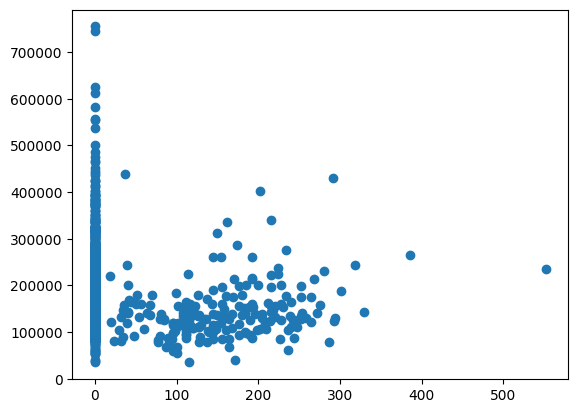

In [59]:
plt.scatter(x="EnclosedPorch", y="SalePrice", data=train_df)

In [60]:
train_df.query("EnclosedPorch>500")
#Drop 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


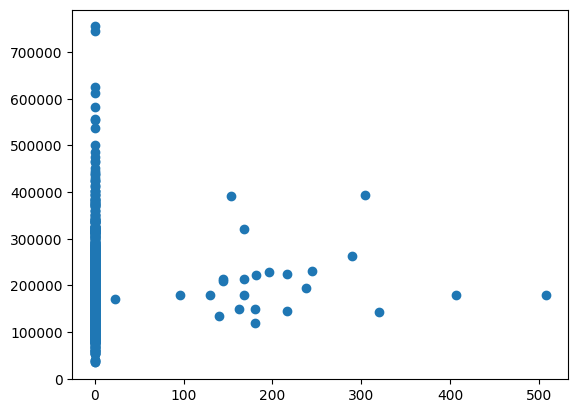

In [61]:
plt.scatter(x="3SsnPorch", y="SalePrice", data=train_df)

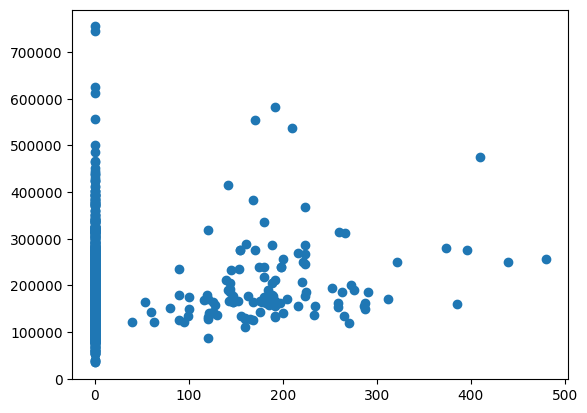

In [62]:
plt.scatter(x="ScreenPorch", y="SalePrice", data=train_df)

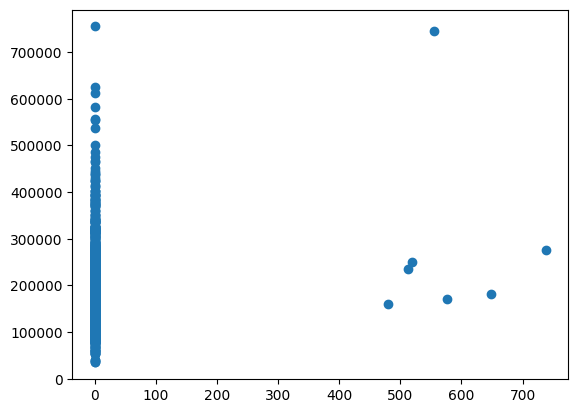

In [63]:
plt.scatter(x="PoolArea", y="SalePrice", data=train_df)

In [64]:
values=[598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 524, 739, 636, 1062, 1191, 496, 198]

In [65]:
train_df=train_df[train_df.Id.isin(values)==False]

In [66]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1436
MiscFeature,1389
Alley,1350
Fence,1163
MasVnrType,862
FireplaceQu,685
LotFrontage,255
GarageYrBlt,77
GarageCond,77
GarageType,77


In [67]:
train_df["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [68]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [69]:
train_df["Alley"].fillna("No", inplace=True)
test_df["Alley"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\685175581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Alley"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\685175581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

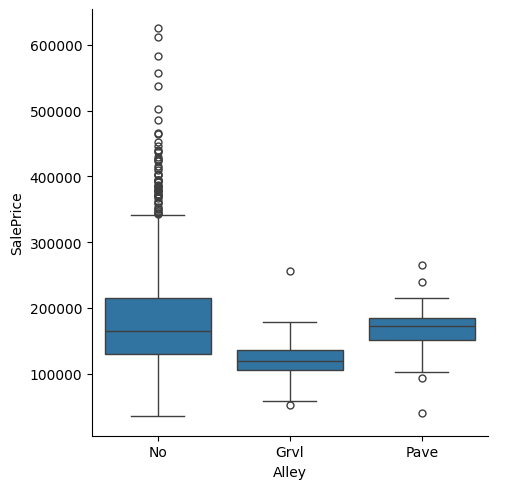

In [70]:
sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

In [71]:
train_df.query('Alley=="Grvl"').count()

Id               50
MSSubClass       50
MSZoning         50
LotFrontage      47
LotArea          50
                 ..
MoSold           50
YrSold           50
SaleType         50
SaleCondition    50
SalePrice        50
Length: 81, dtype: int64

In [72]:
train_df.query('Alley=="Pave"').count()

Id               40
MSSubClass       40
MSZoning         40
LotFrontage      38
LotArea          40
                 ..
MoSold           40
YrSold           40
SaleType         40
SaleCondition    40
SalePrice        40
Length: 81, dtype: int64

In [73]:
train_df["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [74]:
train_df["Fence"].fillna("No", inplace=True)
test_df["Fence"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1903242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Fence"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1903242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

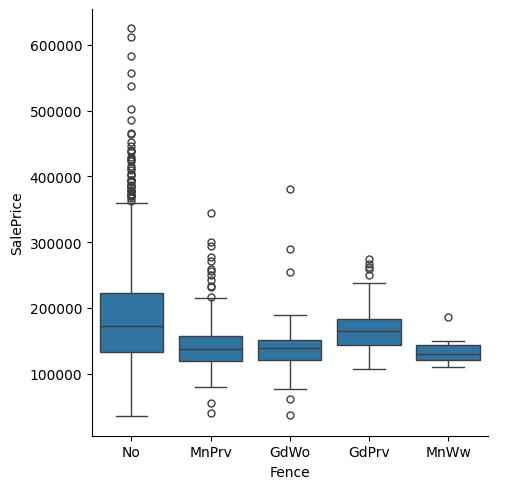

In [75]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

In [76]:
train_df["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [77]:
train_df["MasVnrType"].fillna("No", inplace=True)
test_df["MasVnrType"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1706884976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrType"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1706884976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

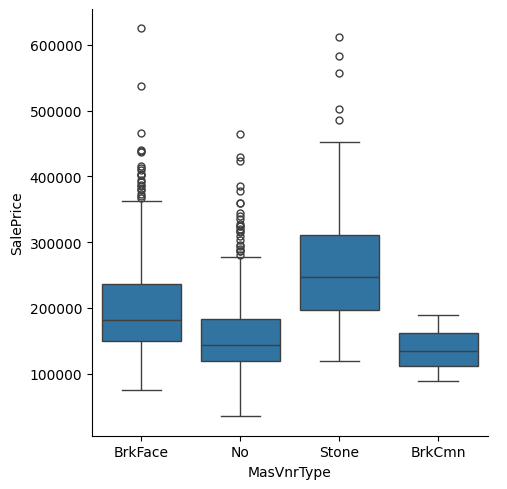

In [78]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

In [79]:
train_df["MasVnrArea"].fillna(0, inplace=True)
test_df["MasVnrArea"].fillna(0, inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2624179461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrArea"].fillna(0, inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2624179461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [80]:
train_df["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [81]:
train_df["FireplaceQu"].fillna("No", inplace=True)
test_df["FireplaceQu"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\946468708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["FireplaceQu"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\946468708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

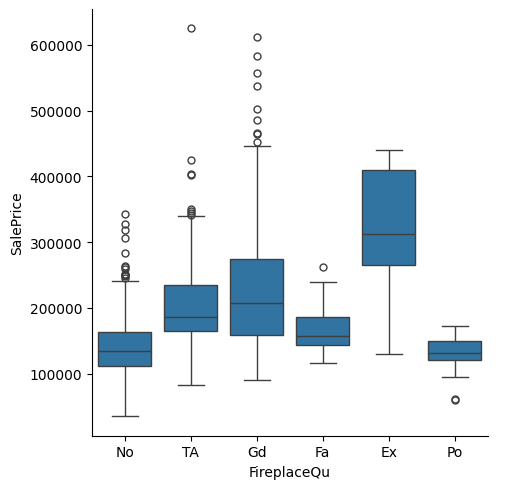

In [82]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

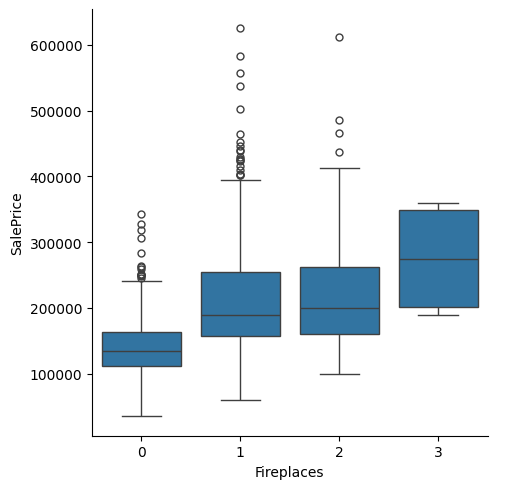

In [83]:
sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

In [84]:
train_df["LotFrontage"].fillna(0, inplace=True)
test_df["LotFrontage"].fillna(0, inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\229894507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["LotFrontage"].fillna(0, inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\229894507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [85]:
train_df["GarageYrBlt"].corr(train_df["YearBuilt"])

0.8289827595060573

In [86]:
train_df["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [87]:
train_df["GarageCond"].fillna("No", inplace=True)
test_df["GarageCond"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1901959418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageCond"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1901959418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

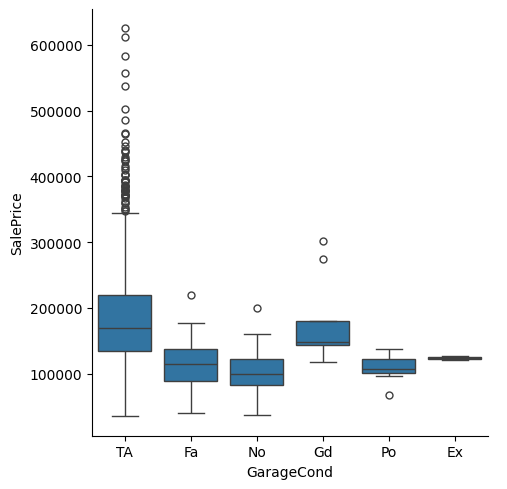

In [88]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [89]:
train_df["GarageType"].fillna("No", inplace=True)
test_df["GarageType"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2085345521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageType"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2085345521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

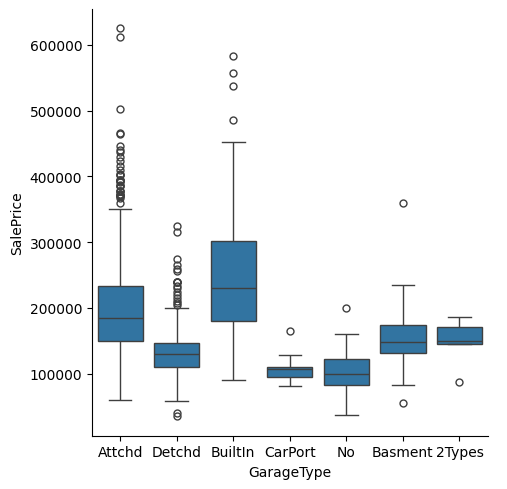

In [90]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [91]:
train_df["GarageFinish"].fillna("No", inplace=True)
test_df["GarageFinish"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\624056212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageFinish"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\624056212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

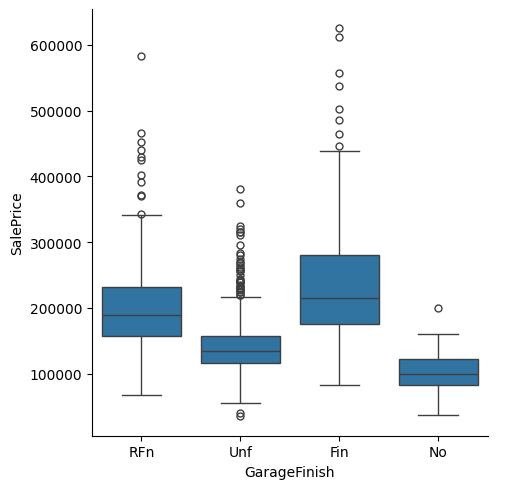

In [92]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [93]:
train_df["GarageQual"].fillna("No", inplace=True)
test_df["GarageQual"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1732249316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageQual"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\1732249316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

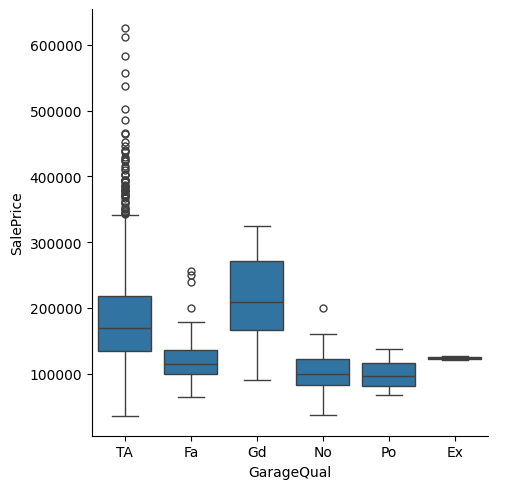

In [94]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [95]:
train_df["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [96]:
train_df["BsmtFinType2"].fillna("Unf", inplace=True)
test_df["BsmtFinType2"].fillna("Unf", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\3948601746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtFinType2"].fillna("Unf", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\3948601746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


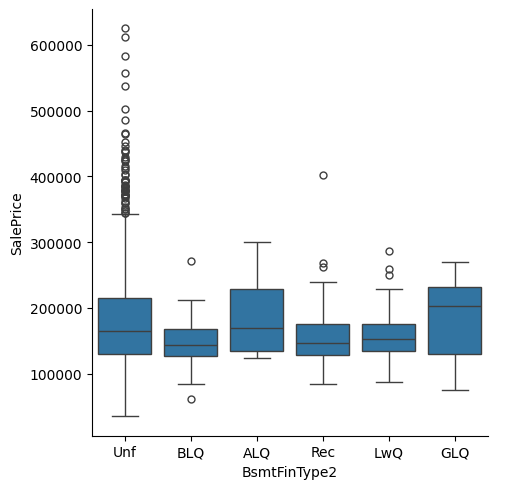

In [97]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [98]:
train_df["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [99]:
train_df["BsmtExposure"].fillna("No", inplace=True)
test_df["BsmtExposure"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\715388517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtExposure"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\715388517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [100]:
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [101]:
train_df["BsmtQual"].fillna("No", inplace=True)
test_df["BsmtQual"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2413074172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtQual"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2413074172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [102]:
train_df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [103]:
train_df["BsmtCond"].fillna("No", inplace=True)
test_df["BsmtCond"].fillna("No", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2078825959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtCond"].fillna("No", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2078825959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

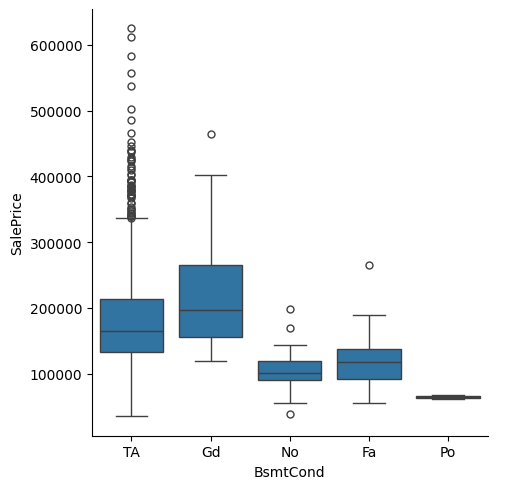

In [104]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [105]:
train_df["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [106]:
train_df["BsmtFinType1"].fillna("Unf", inplace=True)
test_df["BsmtFinType1"].fillna("Unf", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\275542854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtFinType1"].fillna("Unf", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\275542854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

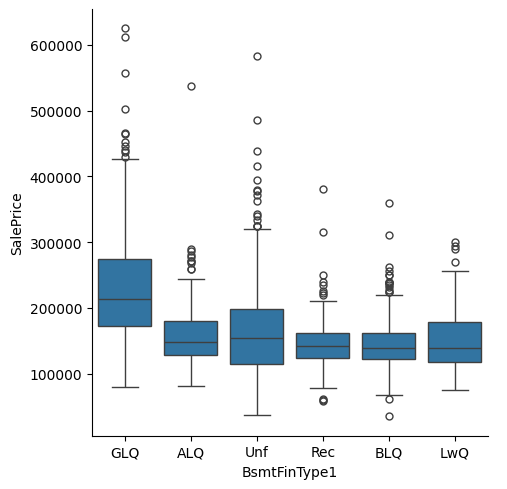

In [107]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [108]:
train_df["MasVnrArea"].fillna(0, inplace=True)
test_df["MasVnrArea"].fillna(0, inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2624179461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrArea"].fillna(0, inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\2624179461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [109]:
train_df["Electrical"].fillna("S8rkr", inplace=True)
test_df["Electrical"].fillna("S8rkr", inplace=True)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\3609854501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Electrical"].fillna("S8rkr", inplace=True)
C:\Users\SURFACE\AppData\Local\Temp\ipykernel_13900\3609854501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [110]:
train_df=train_df.drop(columns=["PoolQC","MiscFeature","Alley","Fence","GarageYrBlt","GarageCond","BsmtFinType2"])
test_df=test_df.drop(columns=["PoolQC","MiscFeature","Alley","Fence","GarageYrBlt","GarageCond","BsmtFinType2"])

In [111]:
#feature engineering

In [112]:
train_df["houseage"]=train_df["YrSold"] - train_df["YearBuilt"]
test_df["houseage"]=test_df["YrSold"] - test_df["YearBuilt"]

In [113]:
train_df["houseremodelage"]=train_df["YrSold"]-train_df["YearRemodAdd"]
test_df["houseremodelage"]=test_df["YrSold"]-test_df["YearRemodAdd"]

In [114]:
train_df["totalsf"]=train_df["1stFlrSF"]+train_df["2ndFlrSF"]+train_df["BsmtFinSF1"]+train_df["BsmtFinSF2"]
test_df["totalsf"]=test_df["1stFlrSF"]+test_df["2ndFlrSF"]+test_df["BsmtFinSF1"]+test_df["BsmtFinSF2"]

In [115]:
train_df["totalarea"]=train_df["GrLivArea"]+train_df["TotalBsmtSF"]
test_df["totalarea"]=test_df["GrLivArea"]+test_df["TotalBsmtSF"]

In [116]:
train_df["totalbaths"]=train_df["BsmtFullBath"]+train_df["FullBath"]+0.5*(train_df["BsmtHalfBath"]+train_df["HalfBath"])
test_df["totalbaths"]=test_df["BsmtFullBath"]+test_df["FullBath"]+0.5*(test_df["BsmtHalfBath"]+test_df["HalfBath"])

In [117]:
train_df["totalporchsf"]=train_df["OpenPorchSF"]+train_df["3SsnPorch"]+train_df["EnclosedPorch"]+train_df["ScreenPorch"]
test_df["totalporchsf"]=test_df["OpenPorchSF"]+test_df["3SsnPorch"]+test_df["EnclosedPorch"]+test_df["ScreenPorch"]

In [118]:
print(train_df.columns)
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3Ssn

In [119]:
train_df = train_df.drop(["Id", "YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", "TotalBsmtSF", "BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath", "OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch"], axis=1)
test_df = test_df.drop(["YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", "TotalBsmtSF", "BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath", "OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch"], axis=1)


In [120]:
missing_train_cols = [col for col in ["Id", "YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", "TotalBsmtSF", "BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath", "OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch"] if col not in train_df.columns]
missing_test_cols = [col for col in ["YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", "TotalBsmtSF", "BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath", "OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch"] if col not in test_df.columns]

print("Missing columns in train_df:", missing_train_cols)
print("Missing columns in test_df:", missing_test_cols)

Missing columns in train_df: ['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch']
Missing columns in test_df: ['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch']


<Axes: >

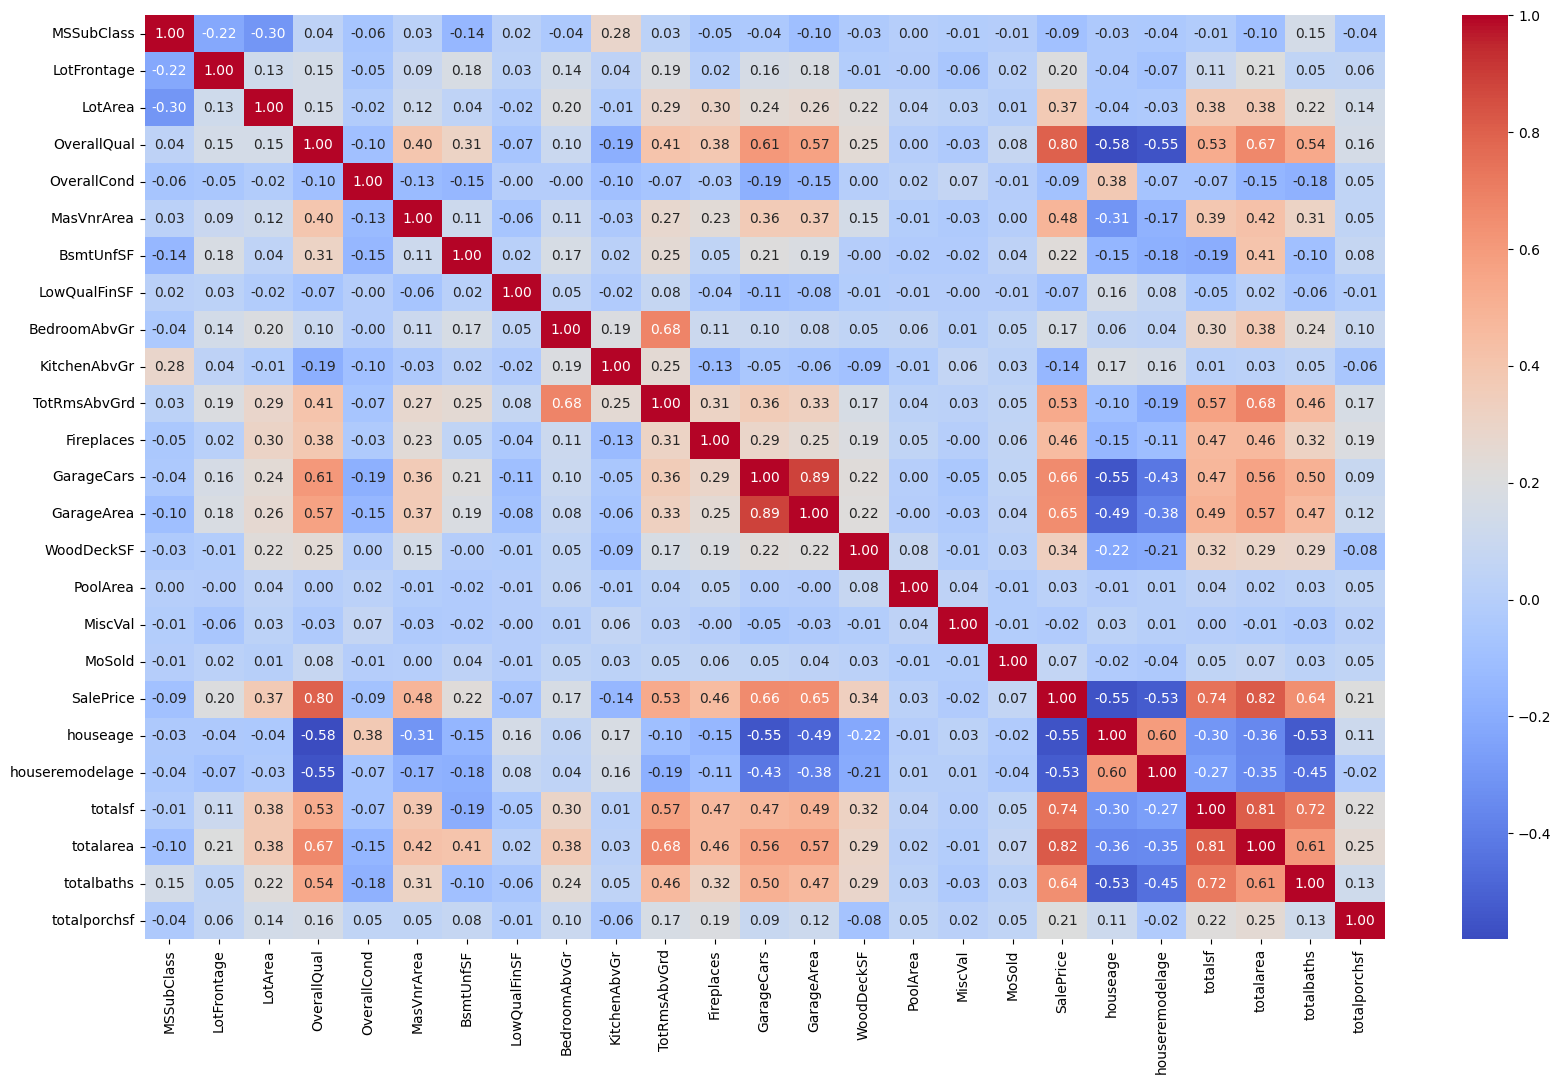

In [121]:
correlation_matrix=train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")

In [122]:
#Drop GarageArea or GarageCars

In [123]:
train_df=train_df.drop(columns=["GarageArea"])
test_df=test_df.drop(columns=["GarageArea"])

<Axes: xlabel='SalePrice', ylabel='Count'>

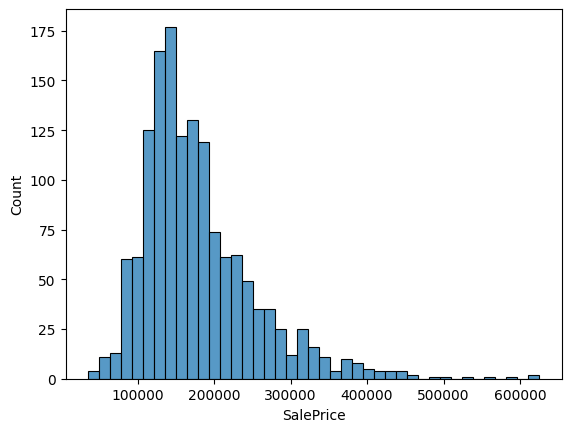

In [124]:
sns.histplot(
    train_df,
    x=train_df["SalePrice"]
)

In [125]:
train_df["SalePrice"]=np.log1p(train_df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

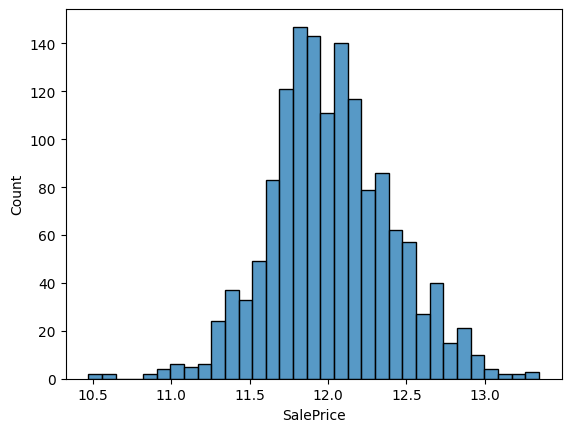

In [126]:
sns.histplot(
    train_df,
    x=train_df["SalePrice"]
)

In [127]:
train_df.dtypes[train_df.dtypes=="object"]

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [128]:
train_df.dtypes[train_df.dtypes!="object"]

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
WoodDeckSF           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [129]:
ode_cols=["LotShape","LandContour","Utilities","LandSlope","BsmtQual","BsmtFinType1","CentralAir","Functional","FirePlaceQu","GarageFinish","GarageQual","PavedDrive","ExterCond","KitchenQual","HeatingQC","BsmtExposure"]

In [130]:
ohe_cols=["Street","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","Foundation","Electrical","SaleType","MSZoning","SaleCondition","Heating","GarageType","RoofMatl"]

In [131]:
num_cols=train_df.select_dtypes(include=["int64","float64"]).columns
num_cols=num_cols.drop("SalePrice")

In [132]:
num_pipeline=Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [133]:
ode_pipeline=Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

In [134]:
ohe_pipeline=Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [135]:
col_trans=ColumnTransformer(transformers=[
    ("num_p", num_pipeline, num_cols),
    ("ode_p", ode_pipeline, ode_cols),
    ("ohe_p", ohe_pipeline, ohe_cols),
    ],
    remainder="passthrough",
    n_jobs=-1)
    

In [136]:
pipeline=Pipeline(steps=[
    ("preprocessing", col_trans)
])

In [137]:
x=train_df.drop("SalePrice", axis=1)
y=train_df["SalePrice"]

In [138]:
if 'FirePlaceQu' in x.columns:
    print("Column exists")
else:
    print("Column does not exist")

Column does not exist


In [139]:
x['FirePlaceQu'] = 0  # or some other default value

In [140]:
x_preprocessed=pipeline.fit_transform(x)

In [141]:
# Assuming x is your feature dataset and pipeline is your preprocessing pipeline
x_preprocessed = pipeline.fit_transform(x)

# Now you can use x_preprocessed
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=25)

In [142]:
x_train, x_test, y_train, y_test=train_test_split(x_preprocessed, y, test_size=0.2, random_state=25)

In [143]:
#Build models

In [144]:
lr=LinearRegression()

In [145]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Fit the model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Now you can make predictions and evaluate the model
predictions = lr.predict(x_test)
print(predictions)


[12.5]


In [146]:
lr.fit(x_train, y_train)

LinearRegression()

In [147]:
y_pred_lr=lr.predict(x_test)

In [148]:
mean_squared_error(y_test, y_pred_lr)

56.24999999999997

In [149]:
RFR=RandomForestRegressor(random_state=13)

In [150]:
param_grid_RFR={
    "max_depth":[5, 10, 15],
    "n_estimators":[100, 250, 500],
    "min_samples_split":[3, 5, 10]
}

In [151]:
rfr_cv=GridSearchCV(RFR, param_grid_RFR, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

In [152]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model and parameter grid
rfr = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20]
}

# Adjust the number of splits for cross-validation
n_splits = min(3, len(x_train))  # Adjust the number of splits based on the size of the training data

# Perform grid search with cross-validation
from sklearn.model_selection import KFold

cv = KFold(n_splits=n_splits)
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=cv)
rfr_cv.fit(x_train, y_train)

# Now you can make predictions and evaluate the model
predictions = rfr_cv.predict(x_test)
print(predictions)


c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

[15.]


c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [153]:
rfr_cv.fit(x_train, y_train)

c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100]})

In [154]:
y_pred_rfr=rfr_cv.predict(x_test)

In [155]:
mean_squared_error(y_test, y_pred_rfr)

25.0

In [156]:
np.sqrt(-1*rfr_cv.best_score_)

nan

In [157]:
rfr_cv.best_params_

{'max_depth': None, 'n_estimators': 10}

In [158]:
XGB= XGBRegressor(random_state=13)

In [159]:
param_grid_XGB={
    "learning_rate":[0.05, 0.1, 0.2],
    "n_estimators":[300],
    "max_depth":[3],
    "min_child_weight":[1, 2, 3],
    "gamma":[0, 0.1, 0.2], 
    "subsample":[0.8, 0.9, 1.0],
    "colsample_bytree":[0.8, 0.9, 1.0],
}

In [160]:
xgb_cv=GridSearchCV(XGB, param_grid_XGB, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model and parameter grid
xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9]
}

# Adjust the number of splits for cross-validation
n_splits = min(3, len(x_train))  # Adjust the number of splits based on the size of the training data

# Perform grid search with cross-validation
cv = KFold(n_splits=n_splits)
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv)
xgb_cv.fit(x_train, y_train)

# Now you can make predictions and evaluate the model
predictions = xgb_cv.predict(x_test)
print(predictions)


c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

[11.312495]


c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

In [162]:
xgb_cv.fit(x_train, y_train)

c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    i...s=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'max_depth': [3, 6, 9], 'n_estimators': [10, 50, 100]})

In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model and parameter grid
xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9]
}

# Adjust the number of splits for cross-validation
n_splits = min(3, len(x_train))  # Adjust the number of splits based on the size of the training data

# Perform grid search with cross-validation
cv = KFold(n_splits=n_splits)
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
xgb_cv.fit(x_train, y_train)

# Calculate the best score
best_score = np.sqrt(-1 * xgb_cv.best_score_)
print(f"Best score (RMSE): {best_score}")


Best score (RMSE): 7.071303566033189


In [164]:
ridge=Ridge()

In [165]:
param_grid_ridge={
    "alpha":[0.05, 0.1, 1, 3, 5, 10],
    "solver":["auto", "svd", "cholesky", "lsqr", "sparse_sg", "sag"]
}

In [166]:
ridge_cv=GridSearchCV(ridge, param_grid_ridge, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model and parameter grid
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Adjust the number of splits for cross-validation
n_splits = min(3, len(x_train))  # Adjust the number of splits based on the size of the training data

# Perform grid search with cross-validation
cv = KFold(n_splits=n_splits)
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=cv)
ridge_cv.fit(x_train, y_train)

# Calculate the best score
best_score = np.sqrt(-1 * ridge_cv.best_score_)
print(f"Best score (RMSE): {best_score}")

# Now you can make predictions and evaluate the model
predictions = ridge_cv.predict(x_test)
print(predictions)


Best score (RMSE): nan
[12.65758951]


c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

In [168]:
ridge_cv.fit(x_train, y_train)

c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SURFACE\AppData\Local\Programs\Pyth

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model and parameter grid
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Adjust the number of splits for cross-validation
n_splits = min(3, len(x_train))  # Adjust the number of splits based on the size of the training data

# Perform grid search with cross-validation
cv = KFold(n_splits=n_splits)
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)

# Calculate the best score
best_score = np.sqrt(-ridge_cv.best_score_)
print(f"Best score (RMSE): {best_score}")

# Now you can make predictions and evaluate the model
predictions = ridge_cv.predict(x_test)
print(predictions)


Best score (RMSE): 7.171739411123284
[12.65758951]


In [170]:
GBR=GradientBoostingRegressor()

In [171]:
param_grid_GBR={
    "max_depth":[12, 15, 20],
    "n_estimators":[200, 2300, 1000],
    "min_samples_leaf":[10, 25, 50],
    "learning_rate":[0.001, 0.01, 0.1],
    "max_features":[0.01, 0.1, 0.7]
}

In [172]:
GBR_cv=GridSearchCV(GBR, param_grid_GBR, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numeric and encoded categorical features
X_numeric = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model and parameter grid
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9]
}

# Adjust the number of splits for cross-validation
n_splits = min(3, len(x_train))  # Adjust the number of splits based on the size of the training data

# Perform grid search with cross-validation
cv = KFold(n_splits=n_splits)
GBR_cv = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
GBR_cv.fit(x_train, y_train)

# Calculate the best score
best_score = np.sqrt(-GBR_cv.best_score_)
print(f"Best score (RMSE): {best_score}")

# Now you can make predictions and evaluate the model
predictions = GBR_cv.predict(x_test)
print(predictions)


Best score (RMSE): 10.012227737363027
[13.65744188]


In [174]:
GBR_cv.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [3, 6, 9], 'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [175]:
import numpy as np

# Calculate the best score
best_score = np.sqrt(-GBR_cv.best_score_)
print(f"Best score (RMSE): {best_score}")


Best score (RMSE): 10.012227737363027


In [176]:
lgbm_regressor=lgb.LGBMRegressor()

In [177]:
param_grid_lgbm={
    "boosting_type":["gbdt", "dart"],
    "num_leaves":[20, 30, 40],
    "learning_rate":[0.01, 0.05, 0.1],
    "n_estimators":[100, 200, 300]
}

In [178]:
lgbm_cv=GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

In [179]:
lgbm_cv.fit(x_train, y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 16.666667
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [180]:
import numpy as np

# Calculate the best score
best_score = np.sqrt(-lgbm_cv.best_score_)
print(f"Best score: {best_score}")



Best score: 9.354143466934854


In [181]:
catboost=CatBoostRegressor(loss_function="RMSE", verbose=False)

In [182]:
param_grid_cat={
    "iteration":[100, 500, 1000],
    "depth":[4, 6, 8, 10],
    "learning_rate":[0.01, 0.05, 0.1, 0.5]
}

In [183]:
cat_cv=GridSearchCV(catboost, param_grid_cat, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

In [184]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import numpy as np

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# Identify categorical features
categorical_features = ['feature2']  # List of categorical feature names

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
catboost_model = CatBoostRegressor(learning_rate=0.1, random_state=42, verbose=0)

# Define the parameter grid
param_grid = {
    'iterations': [10, 50, 100],  # Correct parameter name
    'depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform grid search with cross-validation
cat_cv = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
cat_cv.fit(x_train, y_train, cat_features=categorical_features)

# Calculate the best score
best_score = np.sqrt(-cat_cv.best_score_)
print(f"Best score: {best_score}")

# Now you can make predictions and evaluate the model
predictions = cat_cv.predict(x_test)
print(predictions)


Best score: 9.385298307388227
[16.52145072]


In [185]:
import numpy as np

# Correct the typo from 'best_scoere_' to 'best_score_'
best_score = np.sqrt(-cat_cv.best_score_)
print(f"Best score: {best_score}")

Best score: 9.385298307388227


In [186]:
vr=VotingRegressor([("gbr", GBR_cv.best_estimator_),
                    ("xgb", xgb_cv.best_estimator_),
                    ("ridge", ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Example data: Replace this with your actual data loading process
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': ['TA', 'A', 'B', 'TA'],
    'target': [10, 20, 15, 25]
})

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# Identify categorical features
categorical_features = ['feature2']

# Create preprocessing pipelines with handling unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define estimators for voting regressor
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor())
]

# Define the model pipeline with preprocessing and voting regressor
vr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor(estimators=estimators))
])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
vr.fit(x_train, y_train)

# Predict and evaluate
predictions = vr.predict(x_test)
print(f"Predictions: {predictions}")


Predictions: [11.25]


In [188]:
y_pred_vr=vr.predict(x_test)

In [189]:
mean_squared_error(y_test, y_pred_vr, squared=False)

c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.75

In [190]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline

# Define estimators with the best models from cross-validation
estimators = [
    ("gbr", GBR_cv.best_estimator_),
    ("xgb", xgb_cv.best_estimator_),
    ("cat", cat_cv.best_estimator_),
    ("lgb", lgbm_cv.best_estimator_),
    ("rfr", rfr_cv.best_estimator_)
]

# Create a VotingRegressor with these estimators
voting_regressor = VotingRegressor(estimators=estimators)

# Define a pipeline if necessary
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', voting_regressor)
])

# Fit the model
model.fit(x_train, y_train)

# Predict and evaluate
predictions = model.predict(x_test)
print(f"Predictions: {predictions}")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 16.666667
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [191]:
stackreg=StackingRegressor(
            estimators=estimators,
            final_estimator=vr
)

In [192]:
from sklearn.ensemble import GradientBoostingRegressor


In [193]:
gbr_model = GradientBoostingRegressor()


In [194]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming x_train is a DataFrame
print(x_train.head())

# Convert categorical features to numeric
for column in x_train.columns:
    if x_train[column].dtype == 'object':
        print(f'Encoding column: {column}')
        le = LabelEncoder()
        x_train[column] = le.fit_transform(x_train[column])

print(x_train.head())


   feature1 feature2
3         4       TA
0         1       TA
2         3        B
Encoding column: feature2
   feature1  feature2
3         4         1
0         1         1
2         3         0


In [195]:
# Fit the model and check attributes
try:
    stackreg.fit(x_train, y_train)
    print("Fitting successful")
    print("Estimators:", stackreg.estimators_)
except Exception as e:
    print(f"Error during fitting: {e}")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 16.666667
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [201]:
y_pred_stack=vr.predict(x_test)

In [202]:
mean_squared_error(y_test, y_pred_stack, squared=False)

c:\Users\SURFACE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.75

In [203]:
print("Training Data Columns:", x_train.columns)
print("Test Data Columns:", test_df.columns)


Training Data Columns: Index(['feature1', 'feature2'], dtype='object')
Test Data Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition',
       'houseage', 'houseremodelage', 'totalsf', 'totalarea', 'totalbaths',
       't

In [205]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Example dataset (replace with your actual dataset)
import pandas as pd

data = pd.DataFrame({
    'age': [25, 32, 47],
    'salary': [50000, 54000, 58000],
    'gender': ['male', 'female', 'male'],
    'department': ['IT', 'HR', 'Finance']
})

# Define the features
numerical_features = ['age', 'salary']
categorical_features = ['gender', 'department']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Example usage with a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Example target variable
target = [0, 1, 0]  # Replace with your actual target

# Fit the pipeline
pipeline.fit(data, target)

# Make predictions
predictions = pipeline.predict(data)
print(predictions)


[0 1 0]
